#### Prepare following datasets from OGT
1. test dataset, 10,000 sequences.
2. training datasets with different number of sequences

In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns

### Build train-test-val datasets 

In [24]:
def build_train_test_original_distribution():
    # split the dataset 95-5
    fhand_train = open('../data/ogt_for_training_original_distribution.fasta','w')
    fhand_test = open('../data/ogt_for_test_original_distribution.fasta','w')
    
    all_recs = [rec for rec in SeqIO.parse('../data/cleaned_ogts.fasta','fasta')]
    print('total number',len(all_recs))
    print(all_recs[:2])
    np.random.shuffle(all_recs)
    print(all_recs[:2])
    
    splt = int(len(all_recs)*0.95)
    print(splt)
    SeqIO.write(all_recs[:splt],fhand_train,'fasta')
    SeqIO.write(all_recs[splt:],fhand_test,'fasta')
    
    fhand_train.close()
    fhand_test.close()

In [1]:
def build_train_val_original_distribution():
    # split the dataset 95-5
    fhand_train = open('../data/ogt_for_training_original_distribution_2nd_split.fasta','w')
    fhand_test = open('../data/ogt_for_val_original_distribution.fasta','w')
    
    all_recs = [rec for rec in SeqIO.parse('../data/ogt_for_training_original_distribution.fasta','fasta')]
    print('total number',len(all_recs))
    print(all_recs[:2])
    np.random.shuffle(all_recs)
    print(all_recs[:2])
    
    splt = int(len(all_recs)*0.95)
    print(splt)
    SeqIO.write(all_recs[:splt],fhand_train,'fasta')
    SeqIO.write(all_recs[splt:],fhand_test,'fasta')
    
    fhand_train.close()
    fhand_test.close()

In [4]:
def plot_dist(infile):
    ogts = [float(line[1:].split()[-1]) for line in open(infile) if line.startswith('>')]
    plt.hist(ogts,50)
    plt.title('var={0:.2f}'.format(np.var(ogts)))
    plt.show()

In [25]:
build_train_test_original_distribution()

total number 3015505
[SeqRecord(seq=Seq('MSGSVILGAARTPIGRLLGSLKDFSGAQLGGFAIKAALEQAGVSPDAVQYTIMG...RVP', SingleLetterAlphabet()), id='A0A229RQY8', name='A0A229RQY8', description='A0A229RQY8 28.0', dbxrefs=[]), SeqRecord(seq=Seq('MAKEIKFSLLYRDMWQSSGKYVPTVDQLLEVAPAIIDMGCFARVETNGGGFEQI...KMR', SingleLetterAlphabet()), id='A0A1G4G7X9', name='A0A1G4G7X9', description='A0A1G4G7X9 37.0', dbxrefs=[])]
[SeqRecord(seq=Seq('MNERPSTNVIRPSGCPGLLRVVQALDGGICRIKLDGGSIRADQADAVAAAAEGF...LDA', SingleLetterAlphabet()), id='J2YB21', name='J2YB21', description='J2YB21 28.0', dbxrefs=[]), SeqRecord(seq=Seq('MTTALDQLKQYTTVVADTGDFQQLAQYQPQDATTNPSLILKAVQKDAYKPILEK...SLR', SingleLetterAlphabet()), id='A0A103Z2S1', name='A0A103Z2S1', description='A0A103Z2S1 30.0', dbxrefs=[])]
2864729


In [3]:
build_train_val_original_distribution()

total number 2864729
[SeqRecord(seq=Seq('MNERPSTNVIRPSGCPGLLRVVQALDGGICRIKLDGGSIRADQADAVAAAAEGF...LDA', SingleLetterAlphabet()), id='J2YB21', name='J2YB21', description='J2YB21 28.0', dbxrefs=[]), SeqRecord(seq=Seq('MTTALDQLKQYTTVVADTGDFQQLAQYQPQDATTNPSLILKAVQKDAYKPILEK...SLR', SingleLetterAlphabet()), id='A0A103Z2S1', name='A0A103Z2S1', description='A0A103Z2S1 30.0', dbxrefs=[])]
[SeqRecord(seq=Seq('MGDVTLTIDGRQVTVQAGTSVLEAATQAGVKIPTLCYLEGLNEIGSCRLCVVEI...PKR', SingleLetterAlphabet()), id='A0A1V5J521', name='A0A1V5J521', description='A0A1V5J521 35.0', dbxrefs=[]), SeqRecord(seq=Seq('MPTSLSARLSAELAGLRESGLLIHPRVLDAANRARTRVDGREVVNLASNNYLGF...TIS', SingleLetterAlphabet()), id='H8GSN2', name='H8GSN2', description='H8GSN2 28.0', dbxrefs=[])]
2721492


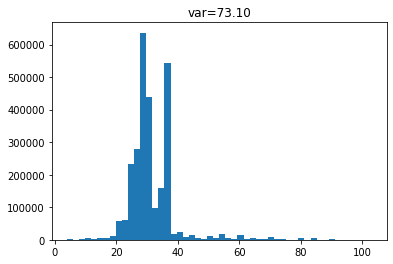

In [5]:
plot_dist('../data/ogt_for_training_original_distribution_2nd_split.fasta')

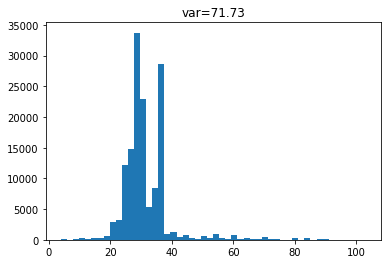

In [6]:
plot_dist('../data/ogt_for_val_original_distribution.fasta')

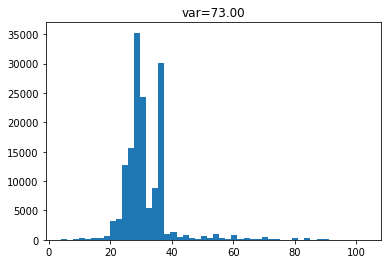

In [7]:
plot_dist('../data/ogt_for_test_original_distribution.fasta')

In [26]:
!head ../pre_train_datasets/ogt_for_training_original_distribution.fasta

>J2YB21 28.0
MNERPSTNVIRPSGCPGLLRVVQALDGGICRIKLDGGSIRADQADAVAAAAEGFAGGVIE
ATNRGNLQIRGIGPRHGALIEQLLAAGLGPRTPAGDDVRNLMLSPSAGIDRQMLVDTRPL
AARILVTLQTHERFHELSAKFAVQLDGGEAMAMLEHHHDLWLSALVCDGEPWLAFGLAGS
PLDEPAGRVPLAQGHALVVAVLEQFLERARPDQTRMRHLLSEVPLDDFIAQLARRVPLQS
CMGWQRDASIDGLHLGAHPQRDDRVYVGAAAPLGRLDAVMLRGAARLAREQGDASLRFTP
WQSLLLPNLRREDADQVLARLEELGLLCSVDQPLAQLIACTGSSGCGNALANTKADARQL
AELLQRQGQTLKIHLSGCPRSCAAAHIAPATLLAVAPGRYDLYFRDATLPGFGALQAHNL
TIEALGHWLDARPRSPLDA
>A0A103Z2S1 30.0


In [27]:
!head ../pre_train_datasets/ogt_for_test_original_distribution.fasta

>A0A1U7M6R4 31.0
MFNKAEEILEVCKLENKSISDIIIEKEIEHLGLTRQQLIEKMRESLEVMKHSATEALEKE
VKSVSGLTGGNSKKIEDYKKKGKTLSGDLINSAMAKAFSTSEVNASMGKIVAAPTAGASG
ILPSAFLSAKEKLNLSDDDLIKGLFTAGGVGEIIAKNATISGAEGGCQAECGSAAAMAAA
AIVEMAGGSVEDSFNAASFALTNIMGLVCDPIAGLVEYPCALRNASGVVNALISADMALA
KVESLVPFDEVVEAMYKVGKALPESLRETALGGLAATPTGKRCSKKILG
>A0A2E9ED41 27.0
MKVFNRIALVARVVSEQIADSLRLVERFLLEHGKEVYIESNSATMFGESASIPKTINEIG
DCCDLVIAVGGDGNILSCAREMAPFGVPILGVNRGKLGFLADISPEDIETSVGQVLMGDY
SVQEHFLLEGKVEGSQNASSALNEVLLHTTVLPKMIEMEIFHNDRYVFTQKSDGLIVSSP


#### Random select 10k sequences from pre_train_datasets/ogt_for_training_original_distribution.fasta for hyperopt

In [10]:
def build_hyperopt_val_oridist():
    fhand = open('../data/ogt_for_hyperopt_original_distribution.fasta','w')
    trainfile = '../data/ogt_for_training_original_distribution.fasta'
    all_recs = [rec for rec in SeqIO.parse(trainfile,'fasta')]
    
    sel_recs = np.random.choice(all_recs,10000,replace=False)
    SeqIO.write(sel_recs,fhand,'fasta')
    fhand.close()
    
    return sel_recs

In [7]:
def build_hyperopt_val_uniformdist():
    # to make a datasets with best representations of all temperature ranges, an uniform sampling were applied.
    fhand = open('../data/ogt_for_hyperopt_uniform_distribution.fasta','w')
    trainfile = '../data/ogt_for_training_original_distribution.fasta'
    all_recs = [rec for rec in SeqIO.parse(trainfile,'fasta')]
    
    # bin recs based on ogt values. with a bin size. 5 degrees
    bin_recs = {}
    for rec in all_recs:
        ogt = float(rec.description.split()[-1])
        g = int(ogt)//5
        lst = bin_recs.get(g,[])
        lst.append(rec)
        bin_recs[g] = lst
        
    num_of_each_bin = int(10000/len(bin_recs))
    sel_recs = list()
    
    for lst in bin_recs.values():
        if len(lst)>num_of_each_bin:
            sel_recs.extend(list(np.random.choice(lst,num_of_each_bin,replace=False)))
        else: sel_recs.extend(lst)
    SeqIO.write(sel_recs,fhand,'fasta')
    fhand.close()
    
    return sel_recs

In [2]:
32//5

6

In [18]:
def plot_recs(sel_recs):
    # plot distribution
    ogts = [float(rec.description.split()[-1]) for rec in sel_recs]
    plt.figure(figsize=(4,3))
    #plt.subplot(1,2,1)
    plt.hist(ogts,20)
    plt.ylabel('Count')
    plt.xlabel('OGT ($^\circ$C)')
    '''
    plt.subplot(1,2,2)
    plt.hist(ogts)
    plt.yscale('log')
    plt.ylabel('Count')
    plt.xlabel('OGT ($^\circ$C)')
    '''
    plt.tight_layout()
    plt.show()

In [31]:
def plot_recs2(sel_recs):
    # plot distribution
    ogts = [float(rec.description.split()[-1]) for rec in sel_recs]
    bins = {}
    for ogt in ogts:
        g = int(ogt)//5
        bins[g] = bins.get(g,0)+1
    print(bins)
    x = list(bins.keys())
    x.sort()
    print(x)
    x = np.array(x)
    
    
    c = [bins[item] for item in x]
    x = x*5
    plt.figure(figsize=(4,3))
    #plt.subplot(1,2,1)
    plt.bar(x,c,width=4,align='center')
    plt.ylabel('Count')
    plt.xlabel('OGT ($^\circ$C)')
    '''
    plt.subplot(1,2,2)
    plt.bar(x,c,width=4)
    plt.yscale('log')
    plt.ylabel('Count')
    plt.xlabel('OGT ($^\circ$C)')
    '''
    plt.tight_layout()
    plt.show()

In [11]:
sel_recs = build_hyperopt_val_oridist()

In [16]:
sel_recs = [rec for rec in SeqIO.parse('../data/ogt_for_hyperopt_original_distribution.fasta','fasta')]

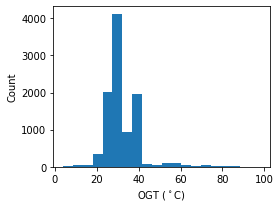

In [19]:
plot_recs(sel_recs)

In [8]:
sel_recs_uniform = build_hyperopt_val_uniformdist()

In [3]:
sel_recs_uniform = [rec for rec in SeqIO.parse('../data/ogt_for_hyperopt_uniform_distribution.fasta','fasta')]

{5: 476, 6: 476, 8: 476, 7: 476, 3: 476, 4: 476, 2: 476, 12: 476, 9: 476, 11: 476, 10: 476, 14: 476, 13: 476, 1: 476, 0: 476, 17: 476, 15: 476, 16: 476, 18: 476, 20: 342, 19: 476}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


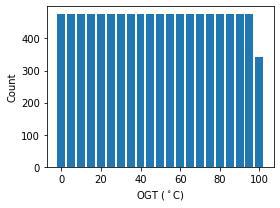

In [32]:
plot_recs2(sel_recs_uniform)

### Rename those files:
ogt_for_training_original_distribution_2nd_split.fata --> cleaned_ogts_train.fasta  
ogt_for_val_original_distribution.fasta --> cleaned_ogts_val.fasta  
ogt_for_test_original_distribution.fasta --> cleaned_ogts_test.fasta	   